# 2D Harmonic oscilator - Schrödinger equation

In [1]:
import numpy as np
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
#Just a function to plot X axes
def ejeX(x):
    return x-x


#Return the second derivative of the theoric wave function
def harmE(t,y,E):
    s = -(E - t**2)*y
    return s

We define a function to use the bisection method to find the eigenvalues, and the 4th order Runge-Kutta method to solve the ordinary diferential equation system.

In [3]:

def bisec(func,a,c,tol): 
    cota = (c-a)/2
    N = 0
   
    while cota >= tol: 
        N = N + 1 
        cota= cota/2
    N = N + 1
        
    if func(a) < 0 :
        for i in range(0,N+1):
            b = (a+c)/2
            if func(b) < 0:
                a = b
            if func(b) > 0:
                c = b
        return b

    if func(a) > 0 :
        for i in range(0,N+1):
            b = (a+c)/2
            if func(b) < 0:
                c = b
            if func(b) > 0:
                a = b
        return b

    
    
def RK_4_1(func,y_0,dy_0,t_0,t_f,E,opcion):   
     
    
    #h = 0.001
    h = 0.05
    N = int((t_f-t_0)/h)
    
    Y = [y_0]
    tiempo = [t_0]
    
    dy_i = dy_0
    y_i = y_0
    t = t_0
    for i in range (0,N):
        k1 = h*dy_i
        l1 = h*func(t,y_i,E)
        
        k2 = h*(dy_i + l1/2)
        l2 = h*func(t + h/2,y_i + k1/2,E)
        
        k3 = h*(dy_i + l2/2)
        l3 = h*func(t + h/2,y_i + k2/2,E)
        
        k4 = h*(dy_i + l3)
        l4 = h*func(t + h,y_i + k3,E)
        
        y = y_i + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        dy = dy_i + (1/6)*(l1 + 2*l2 + 2*l3 + l4)
        
        Y.append(y)
        t = t + h
        tiempo.append(t)
        y_i = y
        dy_i = dy
    
    if opcion == 1 :
        #Y = Y / np.max(Y)  #Normalizamos la función
        #mp.plot(tiempo,Y)
        return Y
    if opcion == 0 :
        return y_i

We define the function wf_hp4 to solve the Schrödinger equation.

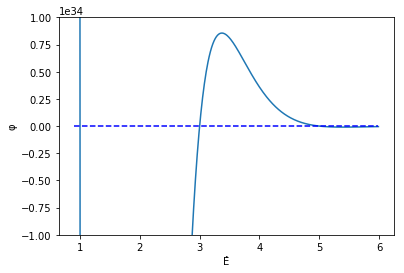

In [8]:

def wf_hp4(E): 
    y  = RK_4_1(harmE,0.00001,0,-10,10,E,0)
    return y


e = np.arange(0.9,6,0.01)
mp.plot(e,wf_hp4(e),e,ejeX(e),'b--')
axes = mp.gca()

axes.set_ylim([-1.*10**34,1.*10**34])
mp.xlabel("E\u0302")   
mp.ylabel("\u03C6")
mp.savefig('autovalores.png')

We then find the eingenvalues.

In [15]:
tol = 10**-12
energy = [bisec(wf_hp4,0.5,1.5,tol),bisec(wf_hp4,2.5,3.5,tol),bisec(wf_hp4,4.5,5.5,tol)]
print(energy)

[0.9999999999995453, 3.0000000000004547, 5.000000000000455]


# Groundstate

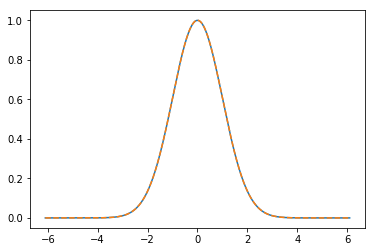

In [224]:
def wf0(x):
    return np.exp(-(x**2)/2)
s = np.arange(-6.1,6.1,(12)/12000)

mp.plot(s,RK_4_1(harmE,0,0.0000001,-6.1,6.1,0.9999999999995453,1),s,wf0(s),'--')
mp.savefig('estado_fundamental.png')

# First excited state

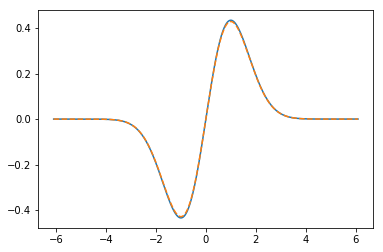

In [225]:
def wf1(x):
    return x*(2**-0.5)*np.exp(-(x**2)/2)
s = np.arange(-6.1,6.1,(12)/12000)
mp.plot(s,RK_4_1(harmE,0,-0.000000425,-6.1,6.1,2.999999999816737,1),s,wf1(s),'--')
mp.savefig('estado_primero.png')

# Second excited state

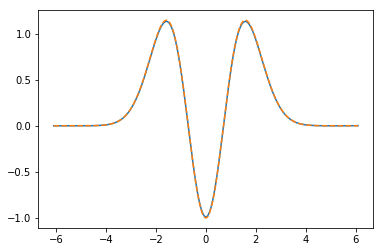

In [226]:
def wf2(x):
    #return 1.2*(2**-0.5)*(2*x**2 - 1)*np.exp(-(x**2)/2)
    return (2*x**2 - 1)*np.exp(-(x**2)/2)
s = np.arange(-6.1,6.1,(12)/12000)

mp.plot(s,RK_4_1(harmE,0,0.00000685,-6.1,6.1,4.999999995129201,1),s,wf2(s),'--')
mp.savefig('estado_segundo.png')

Once we obtained the one dimensional wave functions, we could get the 2-dimensional solution.

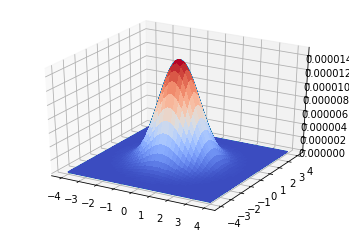

In [232]:
fig = mp.figure()
ax = fig.add_subplot(111, projection='3d')

X = RK_4_1(harmE,0,0.00001,-4,4,0.9999999999995453,1)

N = int(np.size(X))

Z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Z[i,j] = X[i]* X[j]

t = np.arange(-4,4.05,0.05)
s = np.arange(-4,4.05,0.05)
t,s = np.meshgrid(s,t)


ax.plot_wireframe(t, s, Z , rstride=1, cstride=1)
 
surf = ax.plot_surface(t, s, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

mp.savefig('estado_fundamental_2d.png')
mp.show()


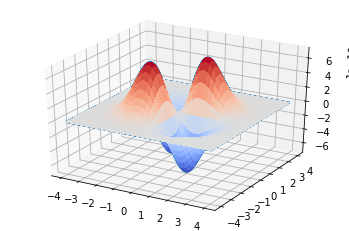

In [233]:
fig = mp.figure()
ax = fig.add_subplot(111, projection='3d')

X = RK_4_1(harmE,0,-0.000000425,-4,4,2.999999999816737,1)

N = int(np.size(X))

Z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Z[i,j] = X[i]* X[j]


t = np.arange(-4,4.05,0.05)
s = np.arange(-4,4.05,0.05)
t,s = np.meshgrid(s,t)

ax.plot_wireframe(t, s, Z , rstride=1, cstride=1)
 
surf = ax.plot_surface(t, s, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

mp.savefig('estado_primero_2d.png')
mp.show()


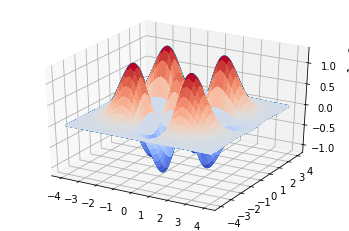

In [234]:
fig = mp.figure()
ax = fig.add_subplot(111, projection='3d')

X = RK_4_1(harmE,0,0.00000685,-4,4,4.999999995129201,1)

N = int(np.size(X))

Z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Z[i,j] = X[i]* X[j]

t = np.arange(-4,4.05,0.05)
s = np.arange(-4,4.05,0.05)
t,s = np.meshgrid(s,t)

ax.plot_wireframe(t, s, Z , rstride=1, cstride=1)
 
surf = ax.plot_surface(t, s, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

mp.savefig('estado_segundo_2d.png')
mp.show()
